<a href="https://colab.research.google.com/github/IamShubhamRana/tcl/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE 599 - HW 1 - Part 1 Gradient Descent

Your task in this Colab notebook is to fill out the sections that are specified by **TODO**.

# Resources
* [Get Started with Google Colaboratory](https://youtu.be/inN8seMm7UI)
* [Google Colab: Basic Features Overview](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)
* [Uploading and Saving GitHub Notebooks](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [54]:
# The following code should not be modified.

import numpy as np
import matplotlib.pyplot as plt
import pprint
import sys


# Create a PrettyPrinter object with an indentation of 4 spaces
pp = pprint.PrettyPrinter(indent=4)

%matplotlib inline
plt.style.use(['ggplot'])



In [55]:
# The following code should not be modified. You can use the dbg function for debugging your variables.
# The following code mounts the utility folder to your working directry
# Then, you can import modules inside UtilFolder in your google drive.
# This code block will prompt you to login to you Google Drive
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/UtilFolder/')
from utils import dbg

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Gradient Descent for Linear Regression

Given two vectors, X and Y, that represent the input and output values of a linear relationship, we can fit a line to this data to predict the output for other values of X. This can be done by finding the parameters $\theta_0$ and $\theta_1$ of the line, such that the line minimizes the squared error between the predicted and actual output values.

The equation for the line is:

\begin{equation}
\hat{y} =\theta_0 + \theta_1 \cdot x
\end{equation}

where:

* $\hat{y}$ is the predicted output value.
* $\theta_0$ is the intercept
* $\theta_1$ is the slope

Let's use Gradient Descent to find the best values for $\mathbf{\Theta}$ as defined below:

\begin{equation}
\mathbf{\Theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} \end{equation}


# Create Data


<h5> Let's generate some data with:

\begin{equation} \mathbf{\Theta} = \begin{bmatrix} 3 \\ 2 \end{bmatrix} \end{equation}

We will use this data to fit the line and then use it to predict the output for other values of $x$.

**TODO:** Below, write the Python code such that:
*   `number_of_samples` is an integer variable
*   X is a vector of `number_of_samples` numbers between 1, 100
*   Y is a vector of `number_of_samples` numbers where each $y = \theta_0 + \theta_1 \cdot x$ plus some noise, which is a random value between 0 and 1.


In [56]:
number_of_samples = 100

X = 2 * np.random.rand(number_of_samples, 1)
y = 3 + 2 * X +  np.random.rand(number_of_samples, 1)


theta_guess = np.array([[1.0], [1.0]])
learning_rate = 0.001
num_iterations = 500

final_cost = {}
final_theta = {}

**TODO:** Plot and visualize your data:

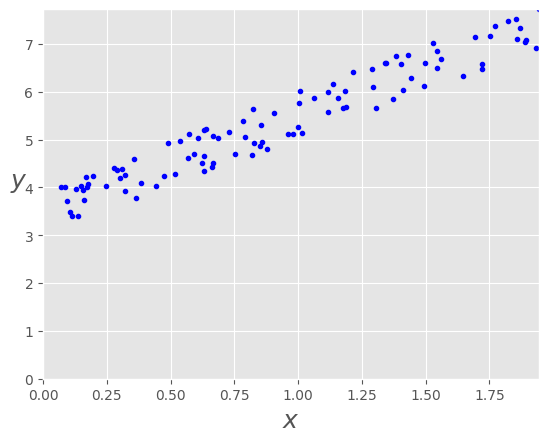

In [57]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,np.max(X),0,np.max(y)])

# Gradient Descent Implementation

## Cost Function & Gradients

<h4> The equation for calculating cost function and gradients are as shown below.

### Cost:
\begin{equation}
J(\theta_0, \theta_1) = \text{MSE}(\theta_0, \theta_1) = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2
\end{equation}

### Gradient:

\begin{equation}
\nabla J(\theta_0, \theta_1) = \left( \frac{\partial J}{\partial \theta_0}, \frac{\partial J}{\partial \theta_1} \right)
\end{equation}

### Replacing $MSE$ for $J$:

\begin{equation}
\nabla J(\theta_0, \theta_1) = \left( \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i) , \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \cdot \mathbf{\hat{X}}_i \right)
\end{equation}

**TODO:** Explain how did we come up with each equation?

**TODO:** In the next cell, Write the Python code for the following functions:


```python
def calculate_prediction_residuals(theta, X, y):
    """
    Calculate the predictions and residuals for a linear regression model.

   Parameters:
    - theta (numpy.ndarray): Parameter vector of shape (num_features,)
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features)
     Each row represents a sample, and each column represents a feature.
                         The first column should be filled with ones for the intercept term.
                         Example:
                         [[1, feature_1_sample_1, feature_2_sample_1],
                          [1, feature_1_sample_2, feature_2_sample_2],
                          ...
                          [1, feature_1_sample_n, feature_2_sample_n]]
    - y (numpy.ndarray): Target values of shape (num_samples,)


    Returns:
    - predictions (numpy.ndarray): Model predictions of shape (num_samples,).
    - residuals (numpy.ndarray): Model residuals of shape (num_samples,).
    """

def calculate_cost(theta, X, y):
    """
    Calculate the cost (Mean Squared Error) for a linear regression model.

    Parameters:
    - theta (numpy.ndarray): Parameter vector of shape (num_features,)
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features)
     Each row represents a sample, and each column represents a feature.
                         The first column should be filled with ones for the intercept term.
                         Example:
                         [[1, feature_1_sample_1, feature_2_sample_1],
                          [1, feature_1_sample_2, feature_2_sample_2],
                          ...
                          [1, feature_1_sample_n, feature_2_sample_n]]
    - y (numpy.ndarray): Target values of shape (num_samples,)

    Returns:
    - cost (float): Computed cost value
    """
```



In [ ]:
def calculate_prediction_residuals(theta, X, y):
  predictions = np.dot(X,theta)
  residuals = predictions - y
  return predictions, residuals


def calculate_cost(theta, X, y):
  cost = np.mean((np.dot(X, theta) - y) ** 2)
  return cost

def calculate_gradient(X, residuals):
  """
    Calculate the gradient for linear regression.

    Parameters:
     - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features)
     Each row represents a sample, and each column represents a feature.
                         The first column should be filled with ones for the intercept term.
                         Example:
                         [[1, feature_1_sample_1, feature_2_sample_1],
                          [1, feature_1_sample_2, feature_2_sample_2],
                          ...
                          [1, feature_1_sample_n, feature_2_sample_n]]
    - residuals (numpy.ndarray): Residuals (difference between predictions and target values) of shape (num_samples,).

    Returns:
    - gradient (numpy.ndarray): Gradient vector of shape (num_features,).
  """

  return None



**TODO:** In the next cell, Write the Python code to implement Gradient Descent. The function signature should be:



```python
gradient_descent(X, y, theta, learning_rate, num_iterations):
    """
    Perform gradient descent to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The first column should be filled with ones for the intercept term.
                         Example:
                         [[1, feature_1_sample_1, feature_2_sample_1],
                          [1, feature_1_sample_2, feature_2_sample_2],
                          ...
                          [1, feature_1_sample_n, feature_2_sample_n]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector of shape (num_features,).
    - learning_rate (float): Learning rate for gradient descent.
    - num_iterations (int): Number of iterations for gradient descent.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (list): List of cost values over iterations.
    - theta_history (list): List of parameter vectors over iterations.
    """
```




In [ ]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    """
    Perform gradient descent to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The first column should be filled with ones for the intercept term.
                         Example:
                         [[1, feature_1_sample_1, feature_2_sample_1],
                          [1, feature_1_sample_2, feature_2_sample_2],
                          ...
                          [1, feature_1_sample_n, feature_2_sample_n]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector of shape (num_features,).
    - learning_rate (float): Learning rate for gradient descent.
    - num_iterations (int): Number of iterations for gradient descent.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (list): List of cost values over iterations.
    - theta_history (list): List of parameter vectors over iterations.
    """
    return None

**TODO** In the next cell, run the GD implementation, store the cost for each iteration and plot the cost vs. iterations.

In [ ]:
theta = theta_guess.copy()

print("Start:")
print(
    "Theta0:          {:0.3f},\nTheta1:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)

# Add a column of ones to the feature matrix X:
X_b = np.c_[np.ones((len(X), 1)), X]

# Run Gradient Descent:
theta, cost_history, theta_history = gradient_descent(
    X_b, y, theta, learning_rate, num_iterations
)
final_theta['GD']= theta


print("End:")
print(
    "Theta0:          {:0.3f},\nTheta1:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))
final_cost['GD']= cost_history[-1]

fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(num_iterations),cost_history,'b.')

### (Optional) Build a function which can show the effects together and also show how gradient decent actually is working

In [ ]:
def plot_gradient_descent(
    num_iterations, learning_rate, X_b, y, data_axis, cost_axis=None
):
    """
    Visualize gradient descent optimization for linear regression.

    Parameters:
    - num_iterations (int): Number of iterations for gradient descent.
    - learning_rate (float): Learning rate for gradient descent.
    - X_b (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - data_axis (matplotlib Axis): Axis to visualize the data points and regression lines.
    - cost_axis (matplotlib Axis): Optional axis to visualize the cost history vs. iterations.

    """
    # Plot the data points as blue dots
    data_axis.plot(
        # Assuming the first column is for the intercept term, select the
        # second column.
        X_b[:, 1], y, "b."
    )
    # Initialize random theta values from a standard normal distribution
    theta = np.random.randn(2, 1)

    # Initial transparency value for plotting regression lines
    transparency = 0.05

    # Initialize an array to store cost history during iterations
    cost_history = np.zeros(num_iterations)

    # Loop through each iteration
    for i in range(num_iterations):
        # Compute predictions using the current theta values
        predictions_prev = X_b.dot(theta)

        # Perform one iteration of gradient descent to update theta values
        theta, current_cost, _ = gradient_descent(X_b, y, theta, learning_rate, 1)

        # Compute predictions using the updated theta values
        predictions = X_b.dot(theta)

        # Store the cost value after the current iteration
        cost_history[i] = current_cost[0]

        # Plot the regression line with adjusted transparency
        if i % 25 == 0:
            data_axis.plot(
                X_b[:, 1], predictions, "r-", alpha=transparency
            )  # Assuming the first column is for the intercept term
            if transparency < 0.8:
                transparency += 0.15

    # If provided, plot cost history vs. iterations
    if cost_axis is not None:
        cost_axis.plot(range(num_iterations), cost_history, "b.")

### (Optional) Plot the graphs for different iterations and learning rates combination

In [ ]:
# Create a figure with subplots for visualization
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# List of iteration and learning rate pairs to iterate through
number_of_iteration_learning_rate_pairs = [(1000, 0.001), (500, 0.01), (100, 0.02)]

# Initialize the subplot count for positioning
subplot_count = 0

# Loop through each iteration and learning rate pair
for number_of_iterations, learning_rate in number_of_iteration_learning_rate_pairs:
    # Increment the subplot count and create data and cost axes
    subplot_count += 1
    data_axis = fig.add_subplot(4, 2, subplot_count)
    subplot_count += 1
    cost_axis = fig.add_subplot(4, 2, subplot_count)

    # Set titles for the data and cost axes
    data_axis.set_title("Learning Rate: {}".format(learning_rate))
    cost_axis.set_title("Iterations: {}".format(number_of_iterations))

    # Call the function to visualize gradient descent
    plot_gradient_descent(
        number_of_iterations, learning_rate, X_b, y, data_axis, cost_axis
    )


# Stochastic Gradient Descent

The main difference between SGD and GD is that SGD uses a **single training example** to update the model parameters at each iteration, while GD uses all of the training examples.


* SGD is less computationally expensive than GD and can converge faster. However, SGD can be more noisy than GD, which means that it may not always converge to the global minimum of the function.
* GD is more robust to outliers and is less likely to get stuck in local minima. However, GD can be more computationally expensive than SGD and may take longer to converge.


**TODO** In the next cell a function to implement SGD. You can use this function signature:

```python
stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    """
    Perform stochastic gradient descent to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The first column should be filled with ones for the intercept term.
                         Example:
                         [[1, feature_1_sample_1, feature_2_sample_1],
                          [1, feature_1_sample_2, feature_2_sample_2],
                          ...
                          [1, feature_1_sample_n, feature_2_sample_n]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector.
    - learning_rate (float): Learning rate for stochastic gradient descent.
    - iterations (int): Number of iterations for stochastic gradient descent.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (numpy.ndarray): Array of cost values over iterations.
    """
```

In [ ]:
def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    """
    Perform stochastic gradient descent to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The first column should be filled with ones for the intercept term.
                         Example:
                         [[1, feature_1_sample_1, feature_2_sample_1],
                          [1, feature_1_sample_2, feature_2_sample_2],
                          ...
                          [1, feature_1_sample_n, feature_2_sample_n]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector.
    - learning_rate (float): Learning rate for stochastic gradient descent.
    - iterations (int): Number of iterations for stochastic gradient descent.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (numpy.ndarray): Array of cost values over iterations.
    """
    return None


**TODO**: Run your SGD implementation and plot the cost vs iteration.

# Stochastic Gradient Descent with Momentum

Stochastic Gradient Descent (SGD) with momentum is an optimization technique that incorporates momentum to enhance the convergence of the optimization process. It is particularly useful for training machine learning models, including neural networks. The momentum term helps to smooth out variations in the gradient updates and accelerates convergence along the steepest direction.

In SGD with momentum, the update rule for the parameters involves a velocity term that accumulates a fraction of the previous gradients. This velocity term adds inertia to the updates, helping the optimization process to move more consistently and smoothly through the optimization landscape. The formula for the update step is as follows:

## Velocity Update:

\begin{equation}
v_t = \beta \cdot v_{t-1} + (1 - \beta) \cdot \nabla J(\theta_t)
\end{equation}


## Parameter Update:

\begin{equation}
\theta_{t+1} = \theta_t - \alpha \cdot v_t
\end{equation}

* $v_t$ is the velocity at iteration $t$.
* $\beta$ is the momentum parameter between 0 and 1, controlling the retention of previous velocity.
* $\nabla J(\theta_{t})$ is the gradient of the cost function at iteration $t$ with respect to the parameters $\theta_{t}$
* $\alpha$ is the learning rate.

The velocity term $v_t$ accumulates a fraction of the previous velocity $v_{t-1}$ and adds the current gradient update $\nabla J(\theta)$
 scaled by $(1-\beta)$. The parameters $\theta_{t+1}$ are then updated by subtracting the scaled velocity term.

**TODO**: Implement the SGD with Momentum. You can use this signature:

```python
def stochastic_gradient_descent_with_momentum(X, y, theta, learning_rate=0.01, momentum=0.9, iterations=10):
    """
    Perform stochastic gradient descent with momentum to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The first column should be filled with ones for the intercept term.
                         Example:
                         [[1, feature_1_sample_1, feature_2_sample_1],
                          [1, feature_1_sample_2, feature_2_sample_2],
                          ...
                          [1, feature_1_sample_n, feature_2_sample_n]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector.
    - learning_rate (float): Learning rate for stochastic gradient descent.
    - momentum (float): Momentum coefficient.
    - iterations (int): Number of iterations for stochastic gradient descent.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (numpy.ndarray): Array of cost values over iterations.
    """
```

In [ ]:
def stochastic_gradient_descent_with_momentum(X, y, theta, learning_rate=0.01, momentum=0.9, iterations=10):
    """
    Perform stochastic gradient descent with momentum to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The first column should be filled with ones for the intercept term.
                         Example:
                         [[1, feature_1_sample_1, feature_2_sample_1],
                          [1, feature_1_sample_2, feature_2_sample_2],
                          ...
                          [1, feature_1_sample_n, feature_2_sample_n]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector.
    - learning_rate (float): Learning rate for stochastic gradient descent.
    - momentum (float): Momentum coefficient.
    - iterations (int): Number of iterations for stochastic gradient descent.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (numpy.ndarray): Array of cost values over iterations.
    """
    num_samples = len(y)
    cost_history = []
    velocity = np.zeros_like(theta)

    # Loop through each iteration
    for iteration in range(iterations):
        total_cost = 0.0

        # Randomly select a sample's index
        random_index = np.random.randint(0, num_samples)

        # Get the feature matrix and target value for the selected sample
        sample_X = X[random_index, :].reshape(1, X.shape[1])
        sample_y = y[random_index].reshape(1, 1)

        _, residuals = calculate_prediction_residuals(theta, sample_X, sample_y)

        # Calculate the gradient for the current sample
        gradient = calculate_gradient(sample_X, residuals)

        # Update the velocity using momentum
        velocity = momentum * velocity +  (1-momentum) * gradient

        # Update the parameter vector using the updated velocity
        theta -= learning_rate * velocity

        cost = calculate_cost(theta, sample_X, sample_y)
        cost_history.append(cost)

    return theta, cost_history

**TODO** Call your implementaiton of SGD with Momentum and plot the Cost vs iteration.

In [ ]:
theta = theta_guess.copy()
momentum = 0.9


print("Start:")
print(
    "Theta0:          {:0.3f},\nTheta1:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
X_b = np.c_[np.ones((len(X), 1)), X]
theta, cost_history = stochastic_gradient_descent_with_momentum(
    X_b, y, theta, learning_rate, momentum, num_iterations
)
final_theta['SGDM']= theta

print("End:")
print(
    "Theta0:          {:0.3f},\nTheta1:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))
final_cost['SGDM']= cost_history[-1]

fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(num_iterations),cost_history[:num_iterations],'b.')

# Mini Batch Stochastic Gradient Descent

Mini-batch stochastic gradient descent (MBSGD) is a variation of stochastic gradient descent (SGD) where updates are made using small batches of data instead of single examples.

This strikes a balance between the efficiency of using the entire dataset (batch gradient descent) and the randomness of SGD.

MBSGD computes gradients and updates model parameters in each iteration using a randomly selected mini-batch of data.

This approach can lead to faster convergence and better utilization of computational resources compared to traditional SGD or full-batch gradient descent.

The size of the mini-batch is a tunable hyperparameter that influences the trade-off between convergence speed and noise in the updates.

**TODO**: In the next cell implement MBSGD. You can use this signature:

```python
def minibatch_gradient_descent(X, y, theta, learning_rate=0.01, num_iterations=10, batch_size=20):
    """
    Perform mini-batch gradient descent to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The first column should be filled with ones for the intercept term.
                         Example:
                         [[1, feature_1_sample_1, feature_2_sample_1],
                          [1, feature_1_sample_2, feature_2_sample_2],
                          ...
                          [1, feature_1_sample_n, feature_2_sample_n]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector of shape (num_features,).
    - learning_rate (float): Learning rate for gradient descent.
    - num_iterations (int): Number of iterations for gradient descent.
    - batch_size (int): Size of each mini-batch.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (list): List of cost values over iterations.
    """
```


In [ ]:
def minibatch_gradient_descent(X, y, theta, learning_rate=0.01, num_iterations=10, batch_size=20):
    """
    Perform mini-batch gradient descent to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The first column should be filled with ones for the intercept term.
                         Example:
                         [[1, feature_1_sample_1, feature_2_sample_1],
                          [1, feature_1_sample_2, feature_2_sample_2],
                          ...
                          [1, feature_1_sample_n, feature_2_sample_n]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector of shape (num_features,).
    - learning_rate (float): Learning rate for gradient descent.
    - num_iterations (int): Number of iterations for gradient descent.
    - batch_size (int): Size of each mini-batch.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (list): List of cost values over iterations.
    """

    # shape of X: (num_samples, num_features)
    # shape of y: (num_samples,)
    # shape of theta: (num_features,)

    num_samples, num_features = X.shape

    # Initialize cost history
    cost_history = []

    # Iterate over the number of iterations
    for i in range(num_iterations):
        # Randomly select a batch of size `batch_size` from the data
        idx = np.random.choice(num_samples, batch_size)
        X_batch, y_batch = X[idx], y[idx]

        # Calculate the gradient for the current mini-batch
        _, residuals = calculate_prediction_residuals(theta, X_batch, y_batch)

        gradient = calculate_gradient(X_batch, residuals)

        # Update the parameters
        theta -= learning_rate * gradient

        # Calculate the cost for the current iteration
        cost = calculate_cost(theta, X_batch, y_batch)
        cost_history.append(cost)

    return theta, cost_history


**TODO**: Run your implementation and plot the cost vs iteration.

In [ ]:
theta = theta_guess.copy()
batch_size = 10

print("Start:")
print(
    "Theta0:          {:0.3f},\nTheta1:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)

# Add a column of ones to the feature matrix X:
X_b = np.c_[np.ones((len(X), 1)), X]

# Run Gradient Descent:
theta, cost_history = minibatch_gradient_descent(
    X_b, y, theta, learning_rate, num_iterations, batch_size = batch_size
)
final_theta['MBGD']= theta

print("End:")
print(
    "Theta0:          {:0.3f},\nTheta1:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))
final_cost['MBGD']= cost_history[-1]
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

ax.plot(range(num_iterations), cost_history,'b.')

# (Optional) Print the final Cost and $\theta$ for each algorithm.

In [ ]:
pp.pprint(final_cost)
print()
pp.pprint(final_theta)

## TODO: Answer the following questions in the next cell.

For these algorithms: GD, SGD, SGD with momentum, MBGD, answer these questions:

1. Assuming the learning rate is the same for all algorithms, what is the worst case runtime complexity of each algorithm. Your answer should be a function of `num_samples`, `num_of_iteration`, and `batch_size`.
1. How many times per iteration do we calculate the gradient in each?
2. How would you compare the efficiency of these algorithms?
3. How would you compare the quality of the result?
4. Can you use the same learning rate for each of these algorithms?
5. Assuming the same rating rate and number of iterations, how many operations does each method performs in total?



**TODO** Write your answers here.

# Linear Regression with PyTorch

Linear Regression can be implemented using PyTorch by defining a linear regression model, specifying a loss function (usually mean squared error), and using an optimization algorithm (e.g., stochastic gradient descent) to update the model parameters to minimize the loss.

**TODO:** In the next cell write a function to perform linear regression using PyTorch.

* Use this signature:

```python
def train_linear_regression(X, y, optimizer_type='SGD', learning_rate=0.01, num_epochs=1000):
    """
    Train a linear regression model using PyTorch.

    Parameters:
    - X (torch.Tensor): Input data tensor of shape (num_samples, num_features).
    - y (torch.Tensor): Target data tensor of shape (num_samples, num_targets).
    - optimizer_type (str): Type of optimizer to use. Options: 'SGD', 'Adam', etc.
    - learning_rate (float): Learning rate for the optimizer.
    - num_epochs (int): Number of training epochs.

    Returns:
    - model (nn.Module): Trained linear regression model.
    """
```    

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def train_linear_regression(X, y, optimizer_type='SGD', learning_rate=0.01, num_epochs=1000):
    """
    Train a linear regression model using PyTorch.

    Parameters:
    - X (torch.Tensor): Input data tensor of shape (num_samples, num_features).
    - y (torch.Tensor): Target data tensor of shape (num_samples, num_targets).
    - optimizer_type (str): Type of optimizer to use. Options: 'SGD', 'Adam', etc.
    - learning_rate (float): Learning rate for the optimizer.
    - num_epochs (int): Number of training epochs.

    Returns:
    - model (nn.Module): Trained linear regression model.
    """

    return None


**TODO:**
* Run your implementation `train_linear_regression.
* Plot the trained line on top of the X,y plot.
* Print your model parameters, i.e. $\theta$.

In [ ]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
trained_model = train_linear_regression(X_tensor, y_tensor, learning_rate=learning_rate, num_epochs=2000)

# Print the model parameters
weight, bias = trained_model.linear.weight[0].data[0], trained_model.linear.bias.data[0]
dbg(weight, bias)

learned_line = weight * X + bias


# plt.plot(X,y,'b.')
# plt.xlabel("$x$", fontsize=18)
# plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([0,np.max(X),0,np.max(y)])


plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, learned_line, color='red', label='Learned Line')

plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.title('Linear Regression')
